### Sprint Clase 1
#### Análisis descriptivo de un conjunto de datos real sobre el estado de salud de un feto durante el parto


In [23]:
# Importamos las librerías que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Indico a pandas que me muestre todas las columnas
pd.set_option('display.max_columns', None)

In [25]:
# Cargamos el dataset, utilizo vscode como editor de código y el dataset lo tengo en la misma carpeta que el notebook
data = pd.read_csv('ASI_casoPractico.csv', sep=';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0


#### Preguntas:

- Pregunta 1: Clasifique cada variable según su tipo, cualitativa o cuantitativa discreta o continúa. 

In [26]:
# Mostramos la información de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [27]:
# Número de valores únicos para cada variable
data.nunique()

ID          2126
b            979
e           1064
LBE           48
AC            22
FM            96
UC            19
ASTV          75
MSTV          57
ALTV          87
MLTV         249
DL            15
DS             2
DP             5
DR             1
Width        154
Min          109
Max           86
Nmax          18
Nzeros         9
Mode          88
Mean         103
Median        95
Variance     133
Tendency       3
Target         2
dtype: int64

Respuesta: 

- Todos los campos son cuantitativos, ya que son valores numéricos.
- Los campos `ID`, `b`, `e` no ofrecen información relevante para el análisis, por lo que se pueden eliminar.
- El campo `DR` es constante, por lo que también se puede eliminar.
- La variable `target`, es la variable a predecir y tiene dos, por lo que es una variable cualitativa dicotómica.
- Los dos campos de tipo `float64` que son `MSTV` y `MLTV` son cuantitativos continuos, ya que representan una media de valores.
- Los campos de tipo `int64` son cuantitativos discretos, ya que representan valores discretos.

In [28]:
# Eliminamos las variables que no nos aportan información
data.drop(['ID', 'b', 'e', 'DR'], axis=1, inplace=True)

In [29]:
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1,0


- Pregunta 2: ¿Cuál es la proporción de estados fetales normales? ¿y anormales?

In [30]:
# Primero calculamos el número de valores para la variable objetivo
normales, anormales = data['Target'].value_counts()
print('Normal: ', normales)
print('Anormal: ', anormales)

Normal:  1655
Anormal:  471


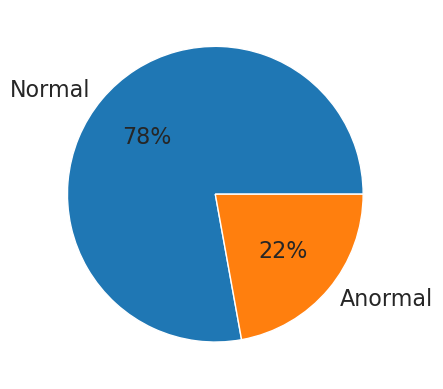

In [31]:
# Creamos un gráfico de tipo pie para ver la proporción de valores normales y anormales
labels = ['Normal', 'Anormal']
values = [normales, anormales]

# Mostramos el tanto por ciento de cada valor de la variable objetivo
plt.pie(values, labels=labels, autopct='%1.0f%%', textprops={'fontsize': 16})
plt.show()

- Pregunta 3: Obtenga las medidas de centralización, localización y dispersión para las variables:  FM, ALTV y Median.

In [32]:
# Medidas de centralización, localización y dispersión para FM, ALTV y Median
data[['FM', 'ALTV', 'Median']].describe().T

,count,mean,std,min,25%,50%,75%,max
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
Median,2126.0,138.090310,14.466589,77.0,129.0,139.0,148.0,186.0


- Podemos ver que para `FM` y `ALTV` la mayoría de valores son 0, menos en los valores más grandes que crecen rápidamente.
- Para `Median`, los valores están más distribuidos ya que la media tiene un valor parecido a la mediana, y los rangons intercuartílicos son similares.


- Obtenga el histograma para las variables: LBE, DS y Min.

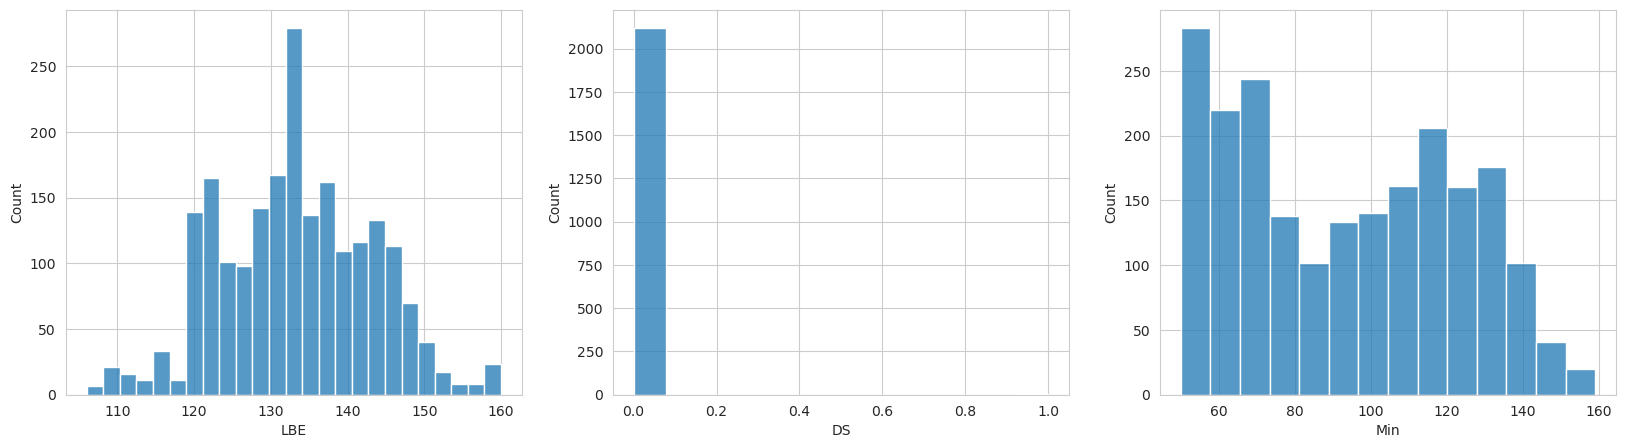

In [33]:
# Create histogram with sns of variables LBE, DS, Min
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data['LBE'], ax=ax[0])
sns.histplot(data['DS'], ax=ax[1])
sns.histplot(data['Min'], ax=ax[2])
plt.show()


- `LBE` tiene una distribución normal
- `DS` tiene prácticamente todos los valores en 0
- `Min` tiene una distribución normal

- Obtenga un gráfico box-plot para las variables: AC, ASTV y Mean. 

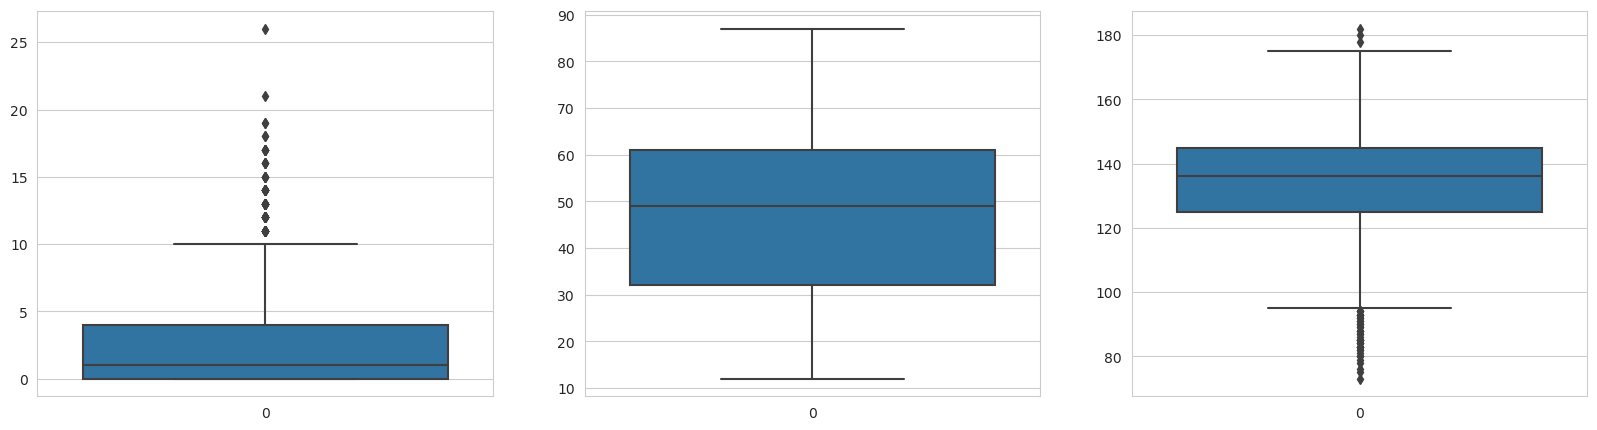

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data['AC'], ax=ax[0])
sns.boxplot(data['ASTV'], ax=ax[1])
sns.boxplot(data['Mean'], ax=ax[2])
plt.show()

- `AC`: Tiene valores atípicos en la parte superior del boxplot, pero la mayoría de los valores están entre 0 y 10. 
- `ASTV`: No presenta valores atípicos ya que representa un tanto por ciento, por lo tanto todos los valores han de estar entre 0 y 100.
- `Mean`: Tiene algunos valores atípicos en la parte superior y en la parte inferior del boxplot, pero representa una distribución normal.